# Import libraries

In [1]:
# Scientific libraries

import numpy as np
import math

# Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data analysis and ML libraries

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import train_test_split


# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss,TomekLinks
from imblearn.combine import SMOTETomek

###
#from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline

###
from functions import my_scaler, evaluate_model

# Import cleaned data

In [2]:
df = pd.read_csv('Data/diabetes_renamed.csv')

# Split

In [3]:
target = "Diabetes_status"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (229474, 21)
y shape: (229474,)


In [4]:
#Train-test split.
#set random_state=42 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

#print("X_train shape:", X_train.shape)
#print("y_train shape:", y_train.shape)
#print("X_test shape:", X_test.shape)
#print("y_test shape:", y_test.shape)

# Feature selection

Here, we will consider two feature selection techniques:
- One statistic (Model independent)
- Random Forest Feature importances (Model dependent)

REMARK: For now we will not consider algorithms like Recursive Feature Elimination because they are more computationally expensive

## Model independent: SelectKBest (mutual information)

Mutual Information:
- Works well with mixed data types
- Doesn't assume linearity
- Can capture ordinal relationships

In [5]:
def selector_Kbest(X, y, score_func=mutual_info_classif):

    #
    scaler = StandardScaler()
    
    #Instantiate KBest selector
    selector = SelectKBest(score_func=score_func, k='all')
    selector.fit(X,y)    
    
    # Get the selected feature indices
    selected_columns = selector.get_support(indices=True)
    important_features = X_train.columns[selected_columns].tolist()
    df = pd.DataFrame({'feature': X.columns, 'K_best_score': selector.scores_})

    return  df

In [6]:
### Rescale our data

X_train_scaled = my_scaler(X_train,StandardScaler());
X_test_scaled = my_scaler(X_test,StandardScaler());

In [7]:
X_train_scaled

,High_BP,High_Chol,Chol_check,BMI,Smoker,Stroke,Heart_condition,Physical_activity,Fruits,Veggies,...,Health_plan,No_Doctor_bc_Cost,General_health,Mental_health,Physical_health,Difficulty_walking,Sex,Age,Education,Income
154325,1,0,1,-0.395435,1,0,0,1,0,1,...,0,0,-0.563578,-0.455262,-0.517047,0,1,-0.350440,0.020709,0.529942
136550,1,1,1,0.786628,0,0,0,1,0,1,...,1,0,0.375330,-0.455262,-0.517047,0,0,0.620283,-0.986375,-1.381726
21711,0,1,1,-0.690951,0,0,0,1,1,1,...,1,0,-0.563578,-0.455262,-0.517047,0,0,0.620283,1.027793,1.007859
210091,0,1,1,-0.986467,0,0,0,1,1,1,...,1,0,-0.563578,-0.455262,-0.517047,0,0,1.591006,0.020709,-0.425892
138820,1,0,1,0.195596,0,0,0,1,1,1,...,1,0,1.314239,-0.455262,0.698722,1,0,-0.350440,-0.986375,-0.425892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131884,1,0,1,-0.543193,1,0,0,1,1,1,...,1,0,-1.502487,-0.455262,-0.517047,0,1,0.620283,1.027793,1.007859
161179,0,0,1,0.047838,0,0,0,1,1,0,...,1,0,0.375330,-0.196479,-0.517047,0,1,1.267431,1.027793,1.007859
188321,1,1,1,-0.543193,0,0,0,1,0,1,...,1,0,1.314239,-0.455262,0.256624,0,1,-0.026865,1.027793,1.007859
60531,0,0,1,0.491112,1,0,0,1,1,1,...,1,0,-0.563578,-0.455262,-0.074949,0,1,-0.674014,1.027793,1.007859


In [8]:
mutual_info_scores = selector_Kbest(X_train, y_train, score_func=mutual_info_classif)

In [9]:
#Let's get the ranks of each feature
mutual_info_scores['K_best_rank'] = mutual_info_scores['K_best_score'].rank().astype(int)
mutual_info_scores

,feature,K_best_score,K_best_rank
0,High_BP,0.049098,21
1,High_Chol,0.032492,16
2,Chol_check,0.038837,18
3,BMI,0.025969,13
4,Smoker,0.020082,11
5,Stroke,0.003601,4
6,Heart_condition,0.011974,5
7,Physical_activity,0.034468,17
8,Fruits,0.028035,14
9,Veggies,0.029234,15


In [10]:
mutual_info_scores.sort_values(by=['K_best_rank'],ascending=False)

,feature,K_best_score,K_best_rank
0,High_BP,0.049098,21
13,General_health,0.045593,20
11,Health_plan,0.038847,19
2,Chol_check,0.038837,18
7,Physical_activity,0.034468,17
1,High_Chol,0.032492,16
9,Veggies,0.029234,15
8,Fruits,0.028035,14
3,BMI,0.025969,13
18,Age,0.024624,12


## Feature importance: Random Forest Classifier (model dependent)

Random Forest:

In [11]:
from sklearn.ensemble import RandomForestClassifier
## RF importance

# Random Forest Importance
rf = RandomForestClassifier(max_depth=5,n_estimators=100, random_state=42,class_weight='balanced',n_jobs=-1)
rf.fit(X_train_scaled, y_train)
rf_scores = pd.DataFrame({
    'feature': X_train.columns,
    'RF_Importance': rf.feature_importances_
})
print(f1_score(rf.predict(X_train_scaled),y_train))
print(f1_score(rf.predict(X_test_scaled),y_test))

0.441772636501909
0.4451299769661073


In [12]:
rf_scores['RF_Importance_rank'] = rf_scores['RF_Importance'].rank().astype(int)
rf_scores.sort_values(by='RF_Importance_rank',ascending=False)

,feature,RF_Importance,RF_Importance_rank
0,High_BP,0.276504,21
13,General_health,0.219875,20
3,BMI,0.127138,19
1,High_Chol,0.125037,18
18,Age,0.093191,17
16,Difficulty_walking,0.056172,16
6,Heart_condition,0.030326,15
15,Physical_health,0.023201,14
20,Income,0.016050,13
7,Physical_activity,0.008573,12


## Deciding the best features

First, we combine the two data frames in a frame called "feature_scores"

In [13]:
feature_scores = pd.merge(mutual_info_scores, rf_scores, on='feature')
feature_scores.head()

,feature,K_best_score,K_best_rank,RF_Importance,RF_Importance_rank
0,High_BP,0.049098,21,0.276504,21
1,High_Chol,0.032492,16,0.125037,18
2,Chol_check,0.038837,18,0.008379,11
3,BMI,0.025969,13,0.127138,19
4,Smoker,0.020082,11,0.000149,4


Now, we add two columns: the average rank between the two features and the difference between the two ranks

In [14]:
#Let's add new columns

feature_scores['rank_avg'] = (feature_scores['K_best_rank']+feature_scores['RF_Importance_rank'])/2
feature_scores['rank_dif'] = abs(feature_scores['K_best_rank']-feature_scores['RF_Importance_rank'])
feature_scores.sort_values(by=['rank_avg'],ascending=False,inplace=True)

In [15]:
feature_scores

,feature,K_best_score,K_best_rank,RF_Importance,RF_Importance_rank,rank_avg,rank_dif
0,High_BP,0.049098,21,0.276504,21,21.0,0
13,General_health,0.045593,20,0.219875,20,20.0,0
1,High_Chol,0.032492,16,0.125037,18,17.0,2
3,BMI,0.025969,13,0.127138,19,16.0,6
2,Chol_check,0.038837,18,0.008379,11,14.5,7
18,Age,0.024624,12,0.093191,17,14.5,5
7,Physical_activity,0.034468,17,0.008573,12,14.5,5
16,Difficulty_walking,0.019302,10,0.056172,16,13.0,6
11,Health_plan,0.038847,19,0.000312,5,12.0,14
15,Physical_health,0.012087,6,0.023201,14,10.0,8


We want:
- Features that are highly ranked in both feature selection methods
- We require then that the average rank is greater than 11 (We have 21 features)
- We require then that the average rank is smaller than 7 (We have 21 features)

REMARK: this criteria can be iterated and refined!

In [16]:
top_features = feature_scores[feature_scores['rank_avg'] > 11][feature_scores['rank_dif'] < 7]

/var/folders/17/2r8tzr0d7nv5d9hz6hrw_6tw0000gn/T/ipykernel_97840/873784558.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_features = feature_scores[feature_scores['rank_avg'] > 11][feature_scores['rank_dif'] < 7]


In [17]:
top_features

,feature,K_best_score,K_best_rank,RF_Importance,RF_Importance_rank,rank_avg,rank_dif
0,High_BP,0.049098,21,0.276504,21,21.0,0
13,General_health,0.045593,20,0.219875,20,20.0,0
1,High_Chol,0.032492,16,0.125037,18,17.0,2
3,BMI,0.025969,13,0.127138,19,16.0,6
18,Age,0.024624,12,0.093191,17,14.5,5
7,Physical_activity,0.034468,17,0.008573,12,14.5,5
16,Difficulty_walking,0.019302,10,0.056172,16,13.0,6


In [18]:
selected_features = top_features['feature'].unique()

In [19]:
# Next, we want to check how some models work with these features.
# We select the top features from the feature dataframe

X_train_scaled_updated = X_train_scaled[selected_features]
X_test_scaled_updated = X_test_scaled[selected_features]

# Build model

Let's see how the model perfoms with these selected features

### Logistic Regression with balanced class weight

Classification report for training data
              precision    recall  f1-score   support

           0       0.94      0.71      0.81    155501
           1       0.31      0.75      0.44     28078

    accuracy                           0.71    183579
   macro avg       0.63      0.73      0.62    183579
weighted avg       0.84      0.71      0.75    183579

Classification report for test data
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     38876
           1       0.31      0.75      0.44      7019

    accuracy                           0.71     45895
   macro avg       0.63      0.73      0.62     45895
weighted avg       0.84      0.71      0.75     45895

Confusion matrix for test set


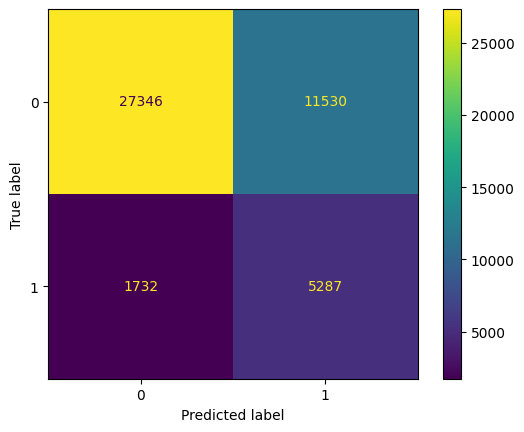

In [20]:
## Build model
LR = LogisticRegression(max_iter=1000,class_weight='balanced')
evaluate_model(LR, X_train_scaled_updated, y_train, X_test_scaled_updated,y_test)


### Random Forest with balanced class weight

Classification report for training data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80    155501
           1       0.31      0.76      0.44     28078

    accuracy                           0.70    183579
   macro avg       0.62      0.73      0.62    183579
weighted avg       0.84      0.70      0.74    183579

Classification report for test data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     38876
           1       0.31      0.77      0.44      7019

    accuracy                           0.70     45895
   macro avg       0.63      0.73      0.62     45895
weighted avg       0.85      0.70      0.74     45895

Confusion matrix for test set


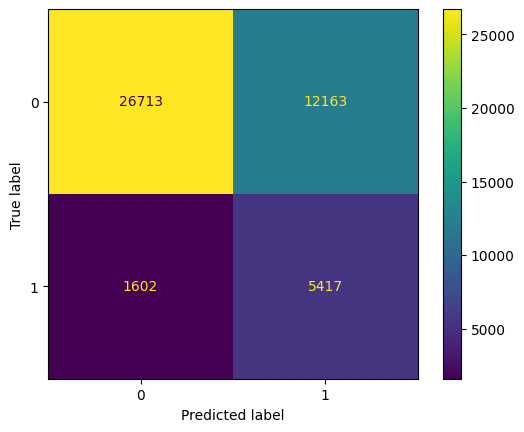

In [21]:
# Random Forest
rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42,class_weight='balanced')
evaluate_model(rf, X_train_scaled_updated, y_train, X_test_scaled_updated,y_test)


REMARKS:

- We can see that after feature selection the both the LR and RF models performs slightly better that having all the 21 features!
- Therefore, from now on we work with a model with fewer features!
- **Pending:** do some research in the medical field to build new features with the existing ones (Metabolic Risk and of this kind)!
- **NEXT:** We do some hyperparameter tuning and play with the classification threshold.

In [22]:
#from pathlib import Path 
X_train[selected_features].to_csv('Data/training_features.csv', index=False)
X_test[selected_features].to_csv('Data/test_features.csv', index=False)
y_train.to_csv('Data/training_target.csv', index=False)
y_test.to_csv('Data/test_target.csv', index=False)

In [24]:
X_train[selected_features].columns

Index(['High_BP', 'General_health', 'High_Chol', 'BMI', 'Age',
       'Physical_activity', 'Difficulty_walking'],
      dtype='object')